In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle

# We're setting an option in pandas to display a maximum of 50 columns when showing DataFrames
pd.set_option('display.max_columns', 50)

# We're setting the plotting style to 'bmh' (Bayesian Methods for Hackers) using matplotlib
plt.style.use('bmh')

# We're accessing the color palette used by default in matplotlib and assigning it to 'color_pal'
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# We're creating a cycle object from the color palette to iterate through colors
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
# Read in the data
cal = pd.read_csv('calendar.csv')
stv = pd.read_csv('sales_train_validation.csv')
ss = pd.read_csv('sample_submission.csv')
sellp = pd.read_csv('sell_prices.csv')

sample_submission.csv - The correct format for submissions. Reference the Evaluation tab for more info.
 - id: A unique identifier for each sales record. It's usually a combination of the product identifier, store identifier, and the forecasted days. This identifier matches the sales_train_validation file's 'id' column for which predictions are being made.

 - F1, F2, ..., F28: These variables represent the forecasted sales for the corresponding day. The numbers after "F" denote the forecasted day number, starting from day 1 to day 28.

In [3]:
ss

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
 - id: A unique identifier for each sales record. It's usually a combination of the product identifier, store identifier, and the forecasted days.

 - item_id: An identifier for the product/item being sold. It could be a unique code or name assigned to each product.

 - dept_id: Denotes the department to which the product belongs. This helps in categorizing products based on their type or category.

 - cat_id: Represents the category to which the product belongs. It's a broader classification compared to the department.

 - store_id: Identifier for the store where the product is being sold. It could be a unique code or name assigned to each store.

 - state_id: Represents the state where the store is located. It helps in categorizing stores based on their geographical location.

 - d_1, d_2, ..., d_1913: These variables represent the daily sales data for the corresponding day. The numbers after "d_" denote the day number starting from day 1. In total, there are typically 1913 days of sales data.

In [4]:
stv

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,...,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,...,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


In [5]:
stv.dtypes

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1909       int64
d_1910       int64
d_1911       int64
d_1912       int64
d_1913       int64
Length: 1919, dtype: object

calendar.csv - Contains information about the dates on which the products are sold.

 - date: This variable represents the date for which the information is recorded. It could be in a specific format such as YYYY-MM-DD.

 - wm_yr_wk: This variable often represents the Walmart fiscal year and week corresponding to the date. It's a unique identifier for each week.

 - weekday: This variable denotes the day of the week for the given date (e.g., Monday, Tuesday, etc.).

 - wday: Similar to "weekday," this variable represents the numerical representation of the day of the week, typically starting from 1 for Sunday.

 - month: This variable represents the month of the year for the given date.

 - year: Denotes the year for the given date.

 - d: This variable often represents a unique identifier for each date in the dataset. It can be used to join with other data files.

 - event_name_1, event_type_1, event_name_2, event_type_2: These variables indicate any events or special occurrences happening on the corresponding date. They might include sales events, holidays, promotions, etc. 
 
 - snap_CA, snap_TX, snap_WI: These variables often represent whether the given date is a SNAP (Supplemental Nutrition Assistance Program) purchase date for the respective state. SNAP purchase dates usually influence sales patterns.

In [6]:
cal

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [7]:
cal.dtypes

date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object

sell_prices.csv - Contains information about the price of the products sold per store and date.
 - store_id: An identifier for the store where the product is sold. It could be a unique code or name assigned to each store.

 - item_id: An identifier for the product/item being sold. It could be a unique code or name assigned to each product.

 - wm_yr_wk: This variable typically represents the Walmart fiscal year and week corresponding to the pricing information. It's a unique identifier for each week.

 - sell_price: The selling price of the product in the corresponding store for the given week. It could be in the currency used in the dataset (e.g., USD).

In [8]:
sellp

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [9]:
sellp.dtypes

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object

In [10]:
# Summary Statistics
print("\nSummary Statistics:")
stv.describe()


Summary Statistics:


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,...,1.137455,1.493473,1.727517,1.850607,1.325615,1.301509,1.283503,1.250115,1.417514,1.847819,1.766350,1.391505,1.281371,1.154247,1.230863,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,...,2.982687,3.696225,4.371541,4.549733,3.353388,3.375255,3.429146,3.292236,3.730618,4.619235,4.290072,3.620804,3.329683,2.933918,3.303282,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,279.000000,258.000000,163.000000,107.000000,133.000000,149.000000,122.000000,111.000000,83.000000,95.000000,100.000000,132.000000,120.000000,113.000000,158.000000,...,130.000000,156

Information obtained from the summary statistics of the sales_train_validation dataset:

 - The standard deviation reflects the variability in sales across different days, suggesting variability in sales patterns across different days.
 - The minimum sales recorded for each day is shown, indicating days with zero sales.
 - The maximum sales recorded for each day indicates the highest number of sales observed, this can be associated to specific discounts or some special days.

In [11]:
# Summary Statistics
print("\nSummary Statistics:")
cal.describe()


Summary Statistics:


,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


Information obtained from the summary statistics of the calendar dataset:

 - The sales data given to us shows the sales of products from 2011 up to 2016. 

In [12]:
# Summary Statistics
print("\nSummary Statistics:")
sellp.describe()


Summary Statistics:


,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


Information obtained from the summary statistics of the sell_prices dataset:

 - The average selling price across all entries is approximately $4.41.
 - The standard deviation of selling prices is approximately $3.41, indicating a relatively wide distribution around the mean.
 - The minimum selling price recorded in the dataset is $0.01, indicating some very low-priced items.
 - 25% of the selling prices are at or below $2.18, as indicated by the first quartile.
 - 50% of the selling prices are at or below $3.47, as indicated by the median (second quartile).
 - 75% of the selling prices are at or below $5.84, as indicated by the third quartile.
 - The maximum selling price recorded in the dataset is $107.32, indicating some relatively high-priced items. However this price is an exception by looking to the quantiles and the mean of the prices, meaning it could be applied to very strict type of product sold by the stores.

In [13]:
# Group the dataset by the category column
grouped_by_category = stv.groupby('cat_id')

# Create an empty dictionary to store the top 10 most sold product IDs and their total units sold for each category
top_products_dict = {}

# Iterate over each category group
for category, group in grouped_by_category:
    # Filter columns starting with 'd_' to get sales data
    sales_cols = [col for col in group.columns if col.startswith('d_')]

    # Calculate total sales for each product in the category group
    total_sales = group[sales_cols].sum(axis=1)

    # Sort products based on total sales
    sorted_products = total_sales.sort_values(ascending=False)

    # Select the top 10 most sold products
    top_10_products = sorted_products.head(10)

    # Get the product IDs and total units sold for the top 10 products
    top_10_product_data = []
    for product_id in top_10_products.index:
        product_data = {
            'product_id': group.loc[product_id, 'id'],
            'total_units_sold': top_10_products[product_id]
        }
        top_10_product_data.append(product_data)

    # Store the product data in the dictionary
    top_products_dict[category] = top_10_product_data

# Display the list of product IDs and total units sold for the top 10 most sold products from each category
print("Top 10 Most Sold Products from Each Category:")
for category, top_products in top_products_dict.items():
    print(f"Category: {category}")
    print("Product ID | Total Units Sold")
    for product_data in top_products:
        print(f"{product_data['product_id']} | {product_data['total_units_sold']}")
    print()


Top 10 Most Sold Products from Each Category:
Category: FOODS
Product ID | Total Units Sold
FOODS_3_090_CA_3_validation | 250502
FOODS_3_586_TX_2_validation | 192835
FOODS_3_586_TX_3_validation | 150122
FOODS_3_586_CA_3_validation | 134386
FOODS_3_090_CA_1_validation | 127203
FOODS_3_090_WI_3_validation | 121434
FOODS_3_090_TX_2_validation | 119496
FOODS_3_090_TX_3_validation | 114854
FOODS_3_252_TX_2_validation | 114153
FOODS_3_586_TX_1_validation | 112454

Category: HOBBIES
Product ID | Total Units Sold
HOBBIES_1_234_CA_3_validation | 29742
HOBBIES_1_348_CA_1_validation | 22744
HOBBIES_1_371_CA_1_validation | 22595
HOBBIES_1_254_CA_3_validation | 20996
HOBBIES_1_371_CA_3_validation | 19812
HOBBIES_1_348_CA_3_validation | 19407
HOBBIES_1_268_CA_1_validation | 18904
HOBBIES_1_341_CA_3_validation | 17844
HOBBIES_1_015_CA_3_validation | 17630
HOBBIES_1_268_CA_3_validation | 16973

Category: HOUSEHOLD
Product ID | Total Units Sold
HOUSEHOLD_1_118_CA_3_validation | 43351
HOUSEHOLD_1_459_CA

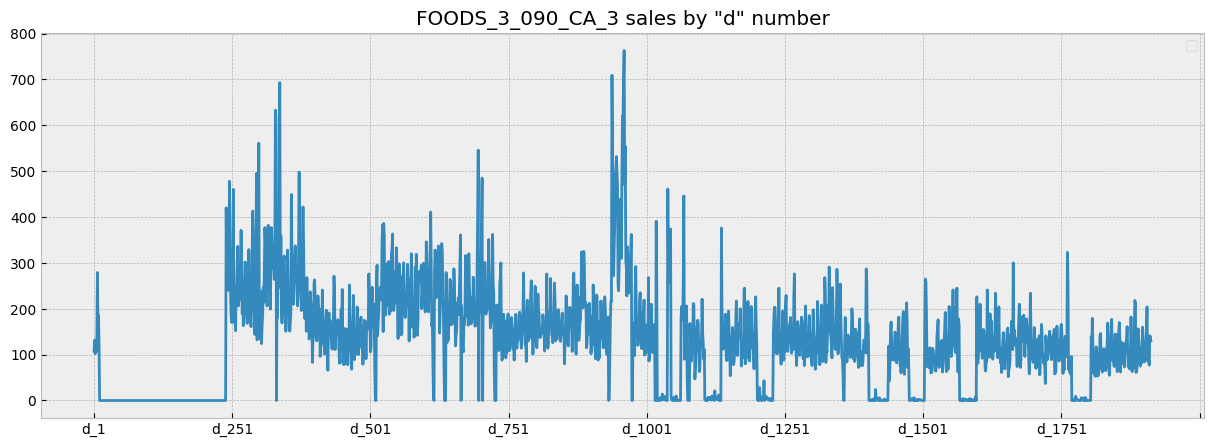

In [14]:
# We're creating a list of column names in the DataFrame 'stv' that contain the substring 'd_'
d_cols = [c for c in stv.columns if 'd_' in c]  # sales data columns

# Selecting rows where the 'id' column is equal to 'FOODS_3_090_CA_3_validation'
selected_data = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation']

# Setting the 'id' column as the index
selected_data_indexed = selected_data.set_index('id')

# Keeping only the columns specified in 'd_cols'
selected_data_cols = selected_data_indexed[d_cols]

# Transposing the DataFrame so that columns become rows and vice versa
transposed_data = selected_data_cols.T

# Plotting the transposed data with a specified figure size and title, using the next color from the color cycle
transposed_data.plot(figsize=(15, 5),
                     title='FOODS_3_090_CA_3 sales by "d" number',
                     color=next(color_cycle))

# Removing the legend from the plot
plt.legend('')

# Displaying the plot
plt.show()


In [15]:
# Search for rows where a specific column meets a condition (most sold product of a category)
stv[stv['id'] == 'FOODS_3_090_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
8412,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,108,132,102,120,106,123,279,175,186,120,0,0,0,0,0,0,0,0,0,...,130,156,133,114,80,75,113,81,107,160,124,107,84,88,90,129,160,204,86,100,88,77,141,139,130


In [16]:
stv[stv['id'] == 'HOBBIES_1_234_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
6324,HOBBIES_1_234_CA_3_validation,HOBBIES_1_234,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,24,20,29,51,6,28,4,78,0,8,20,68,0,24,12,70,0,38,0,54,30,4,32


In [17]:
stv[stv['id'] == 'HOUSEHOLD_1_351_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
7007,HOUSEHOLD_1_351_CA_3_validation,HOUSEHOLD_1_351,HOUSEHOLD_1,HOUSEHOLD,CA_3,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,7,7,18,0,13,11,10,13,8,31,21,6,1,9,23,13,15,7,16,11,4,15,9,6


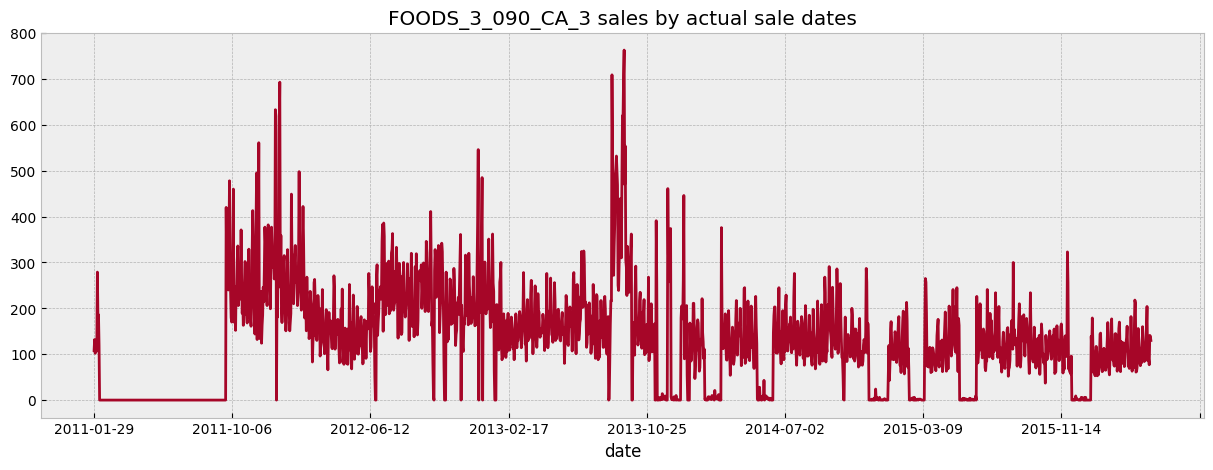

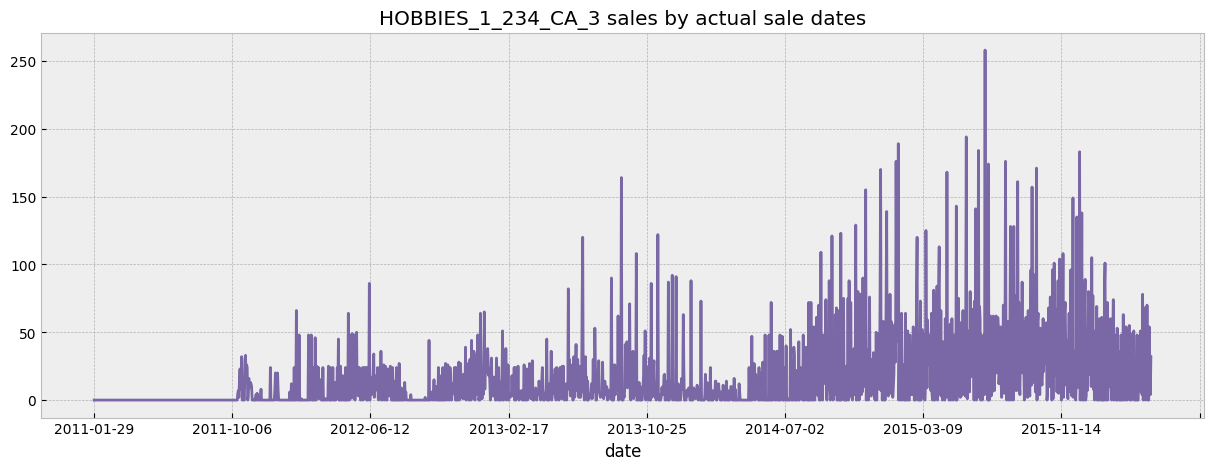

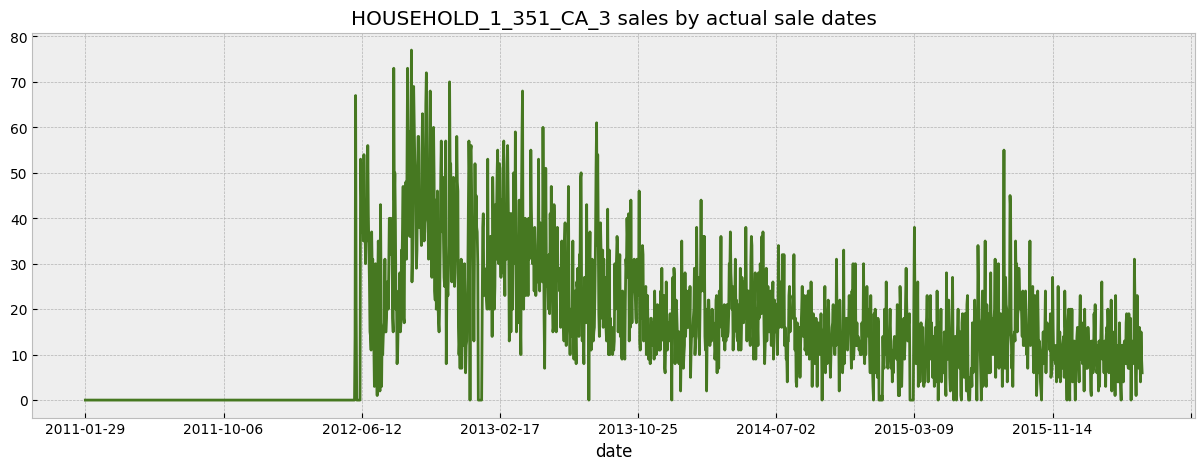

In [18]:
#Selecting and transposing sales data for a specific item ('FOODS_3_090_CA_3_validation')
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T

# Renaming the column to 'FOODS_3_090_CA_3'
example = example.rename(columns={8412:'FOODS_3_090_CA_3'})

# Resetting the index and renaming the index column to 'd'
example = example.reset_index().rename(columns={'index': 'd'})

# Merging with the calendar data based on 'd' column, ensuring one-to-one relationship
example = example.merge(cal, how='left', validate='1:1')

# Setting the index of the DataFrame 'example' to 'date', then plotting the sales data for 'FOODS_3_090_CA_3'
example.set_index('date')['FOODS_3_090_CA_3'].plot(figsize=(15, 5), color=next(color_cycle))
# Adding a title to the plot
plt.title('FOODS_3_090_CA_3 sales by actual sale dates')
# Displaying the plot
plt.show()


# Selecting and processing sales data for another item ('HOBBIES_1_234_CA_3_validation')
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'})
example2 = example2.merge(cal, how='left', validate='1:1')

# Plotting sales data for 'HOBBIES_1_234_CA_3_validation'
example2.set_index('date')['HOBBIES_1_234_CA_3'].plot(figsize=(15, 5), color=next(color_cycle))
# Adding a title to the plot
plt.title('HOBBIES_1_234_CA_3 sales by actual sale dates')
# Displaying the plot
plt.show()


# Selecting and processing sales data for yet another item ('HOUSEHOLD_1_118_CA_3_validation')
example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_351_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={7007:'HOUSEHOLD_1_351_CA_3'})
example3 = example3.reset_index().rename(columns={'index': 'd'})
example3 = example3.merge(cal, how='left', validate='1:1')

# Plotting sales data for 'HOUSEHOLD_1_118_CA_3_validation'
example3.set_index('date')['HOUSEHOLD_1_351_CA_3'].plot(figsize=(15, 5), color=next(color_cycle))
# Adding a title to the plot
plt.title('HOUSEHOLD_1_351_CA_3 sales by actual sale dates')
# Displaying the plot
plt.show()

Some observations from these plots:

 - It is common to see an item unavailable for a period of time.
 - Some items only sell 1 or less in a day, making it very hard to predict.
 - The lack of sales in the first days of the "HOBBIES" and the "HOUSEHOLD" item can be explained by their inexisting in the stores up until their first sales. 
 - The "FOODS" item shows after the first days in the market zero sales for a while. This could be related with a problem in the product and so it could have been removed from the market during that time. 
 - Other items show spikes in their demand possibly due to being bought in special "events" which can help explain these abrupt changes.

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

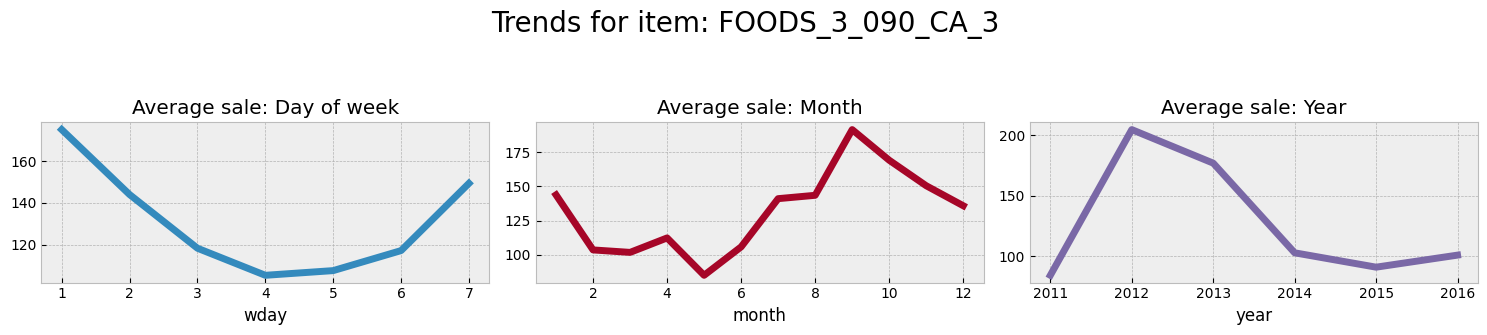

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

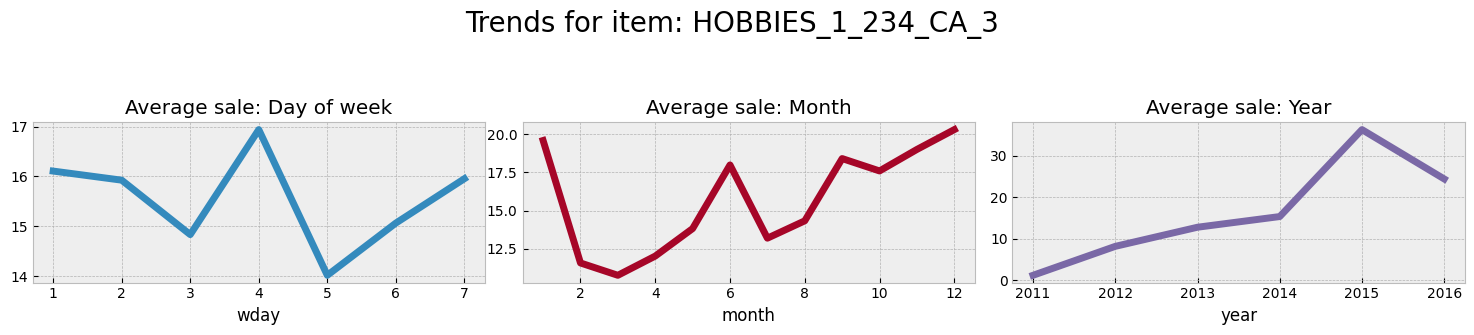

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11316\213320859.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

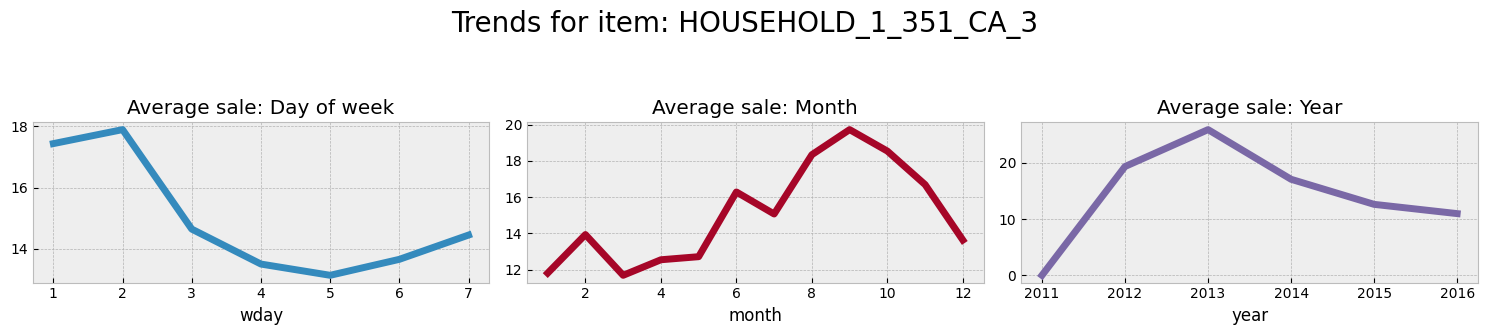

In [19]:
# Define the list of examples - identifiers
examples = ['FOODS_3_090_CA_3', 'HOBBIES_1_234_CA_3', 'HOUSEHOLD_1_351_CA_3']

# Combine the dataframes into a list
example_df = [example, example2, example3]

# Iterate over each example
for i in range(len(examples)):
    # Create subplots with 1 row and 3 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

    # Plot average sales by day of the week
    example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
                                                          title='Average sale: Day of week',
                                                          lw=5,
                                                          color=color_pal[0],
                                                          ax=ax1)

    # Plot average sales by month
    example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
                                                           title='Average sale: Month',
                                                           lw=5,
                                                           color=color_pal[1],
                                                           ax=ax2)

    # Plot average sales by year
    example_df[i].groupby('year').mean()[examples[i]].plot(kind='line',
                                                          title='Average sale: Year',
                                                          lw=5,
                                                          color=color_pal[2],
                                                          ax=ax3)

    # Add a title to the overall figure
    fig.suptitle(f'Trends for item: {examples[i]}', size=20, y=1.1)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


Some observations from these plots:
 
 - Household and Hobby items sell much less in January - after the Holiday season is over.
 
 - Weekends are more popular shopping days. This can occur because people have more time in these days to go purchase items.

 - For the "FOODS" and the "HOUSEHOLD" item we see that they sold very well in the first years and then it declined a bit in more recent years. This can be associated with the apperance of competition arround the store and so it faces more competition.  

 - By looking at the graphs for the "HOBBIES" item we can see that goes against the previous logic since the day with most sales is in the middle of the week. However, since the months were the sales peaks are associated with summer holidays or months with special events, people have more free time to make purchases in other days than the usual weekends. We can also see that this product is being bought a lot more in the last years which can be associated with a rise in the popularity of this specific item. 

In [20]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

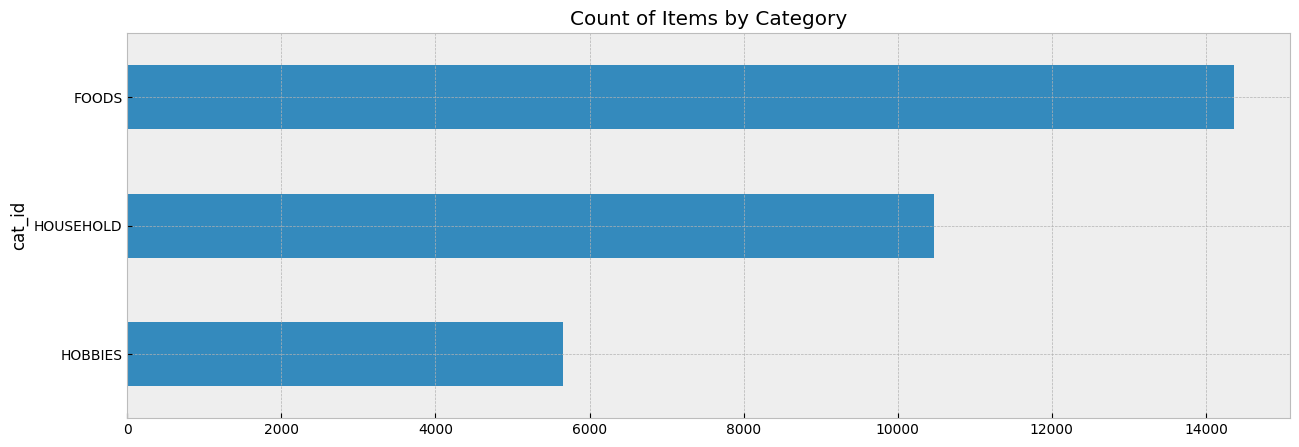

In [21]:
# Group the sales data by 'cat_id' and count the number of unique 'id's in each category
category_counts = stv.groupby('cat_id').count()['id']

# Sort the category counts in ascending order and plot them as a horizontal bar chart
category_counts.sort_values().plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')

# Display the plot
plt.show()

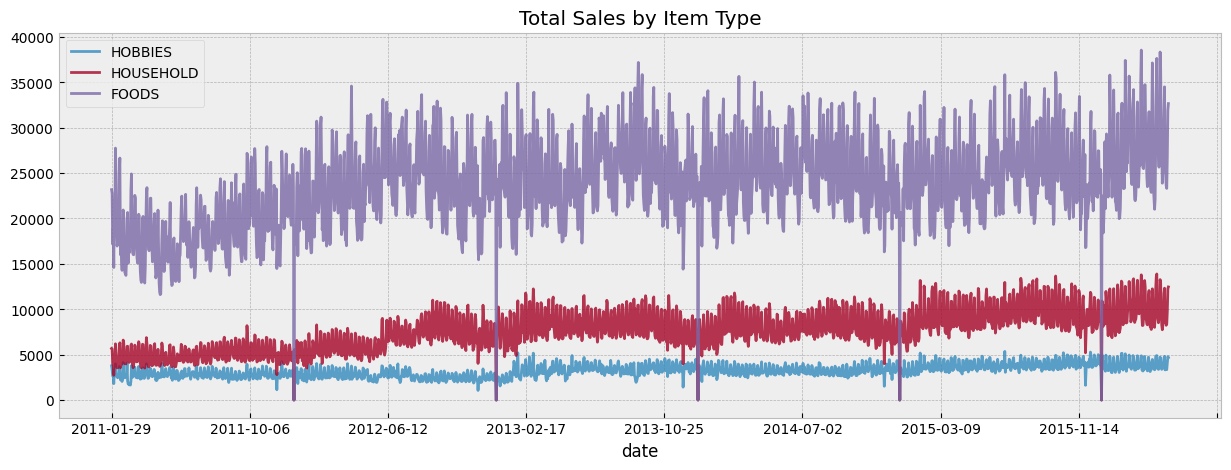

In [22]:
# Create a DataFrame of past sales by setting the index to 'id', transposing it, merging with the calendar data on the date, and setting the index to 'date'
past_sales = stv.set_index('id')[d_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')

# Loop over unique values of 'cat_id'
for category in stv['cat_id'].unique():
    # Select columns corresponding to the current category
    category_columns = [column for column in past_sales.columns if category in column]

    # Sum the sales for items in the current category across all dates
    category_sales = past_sales[category_columns].sum(axis=1)

    # Plot the total sales for the current category
    category_sales.plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Item Type')

# Add legend showing each category
plt.legend(stv['cat_id'].unique())

# Display the plot
plt.show()

A big portion of the sales are from products from the "FOODS" category. This is an expected result since there are more products from this category than the others, which can be seen in the previous boxplot.

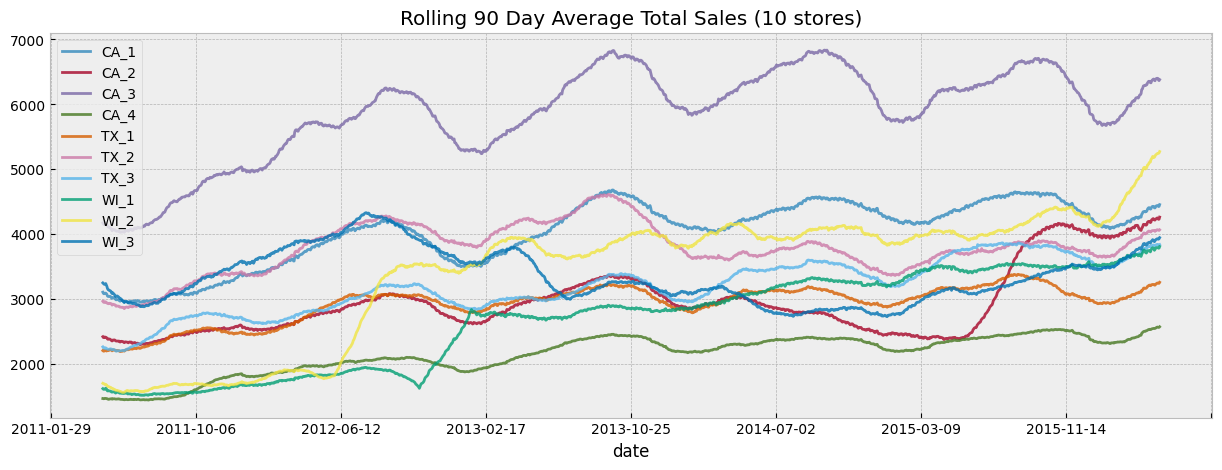

In [23]:
# Get unique store IDs from the sales prices DataFrame
store_list = sellp['store_id'].unique()

# Loop over each store ID
for store_id in store_list:
    # Select columns corresponding to the current store
    store_columns = [column for column in past_sales.columns if store_id in column]

    # Calculate the rolling 90-day average total sales for items in the current store
    store_total_sales_rolling_mean = past_sales[store_columns].sum(axis=1).rolling(90).mean()

    # Plot the rolling 90-day average total sales for the current store
    store_total_sales_rolling_mean.plot(figsize=(15, 5), alpha=0.8, title='Rolling 90 Day Average Total Sales (10 stores)')

# Add legend showing each store ID
plt.legend(store_list)

# Display the plot
plt.show()

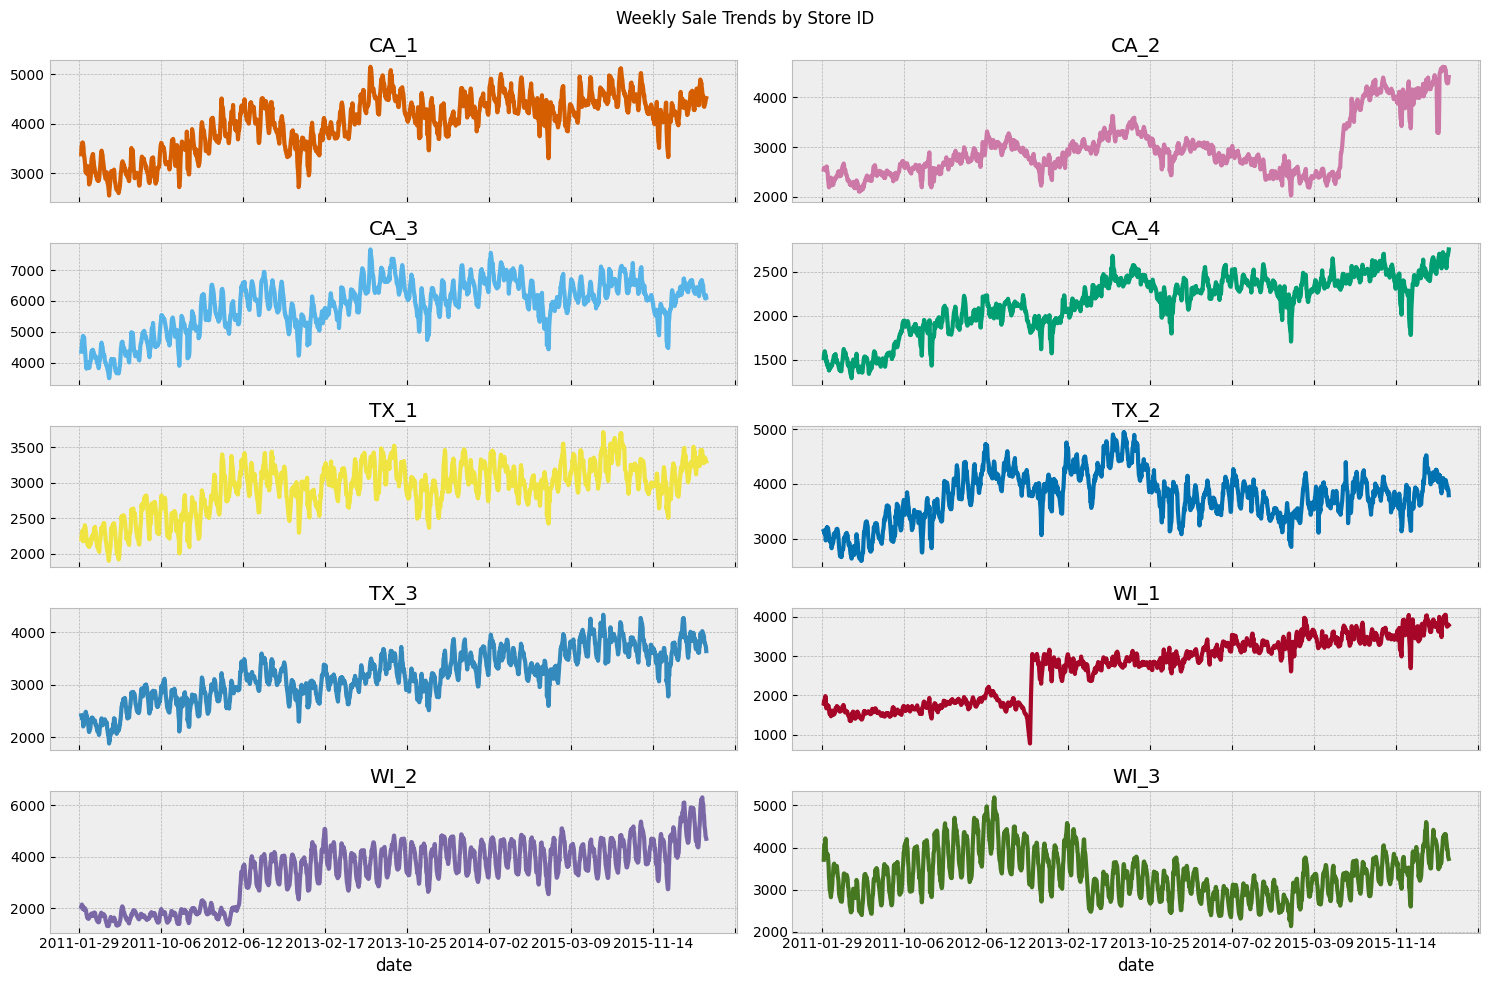

In [24]:
# Create subplots with 5 rows and 2 columns, sharing the x-axis
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Initialize index for accessing subplots
ax_idx = 0

# Loop over each store ID
for store_id in store_list:
    # Select columns corresponding to the current store
    store_columns = [column for column in past_sales.columns if store_id in column]

    # Calculate the rolling 7-day average total sales for items in the current store
    store_total_sales_rolling_mean = past_sales[store_columns].sum(axis=1).rolling(7).mean()

    # Plot the rolling 7-day average total sales for the current store on a subplot
    store_total_sales_rolling_mean.plot(alpha=1, ax=axes[ax_idx], title=store_id, lw=3, color=next(color_cycle))

    # Move to the next subplot index
    ax_idx += 1

# Add overall title to the figure
plt.suptitle('Weekly Sale Trends by Store ID')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Looking at the same data a different way, some stores have abrupt changes in their demand, which can be associated to store expantion or a new competitor was built near by. 

Either way this is imporant to note when creating predictive models about demand pattern.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Function to create a calendar heatmap
def calmap(ax, year, data):
    # Setting tick parameters for x and y axes
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []  # Initializing lists for xticks and labels
    start = datetime(year, 1, 1).weekday()  # Finding the weekday of the first day of the year
    for month in range(1, 13):  # Looping through each month
        first = datetime(year, month, 1)  # Finding the first day of the month
        last = first + relativedelta(months=1, days=-1)  # Finding the last day of the month

        y0 = first.weekday()  # Finding the weekday of the first day of the month
        y1 = last.weekday()  # Finding the weekday of the last day of the month
        x0 = (int(first.strftime("%j")) + start - 1) // 7  # Finding the starting week of the month
        x1 = (int(last.strftime("%j")) + start - 1) // 7  # Finding the ending week of the month

        # Creating polygon coordinates for the month border
        P = [(x0, y0), (x0, 7), (x1, 7),
             (x1, y1 + 1), (x1 + 1, y1 + 1), (x1 + 1, 0),
             (x0 + 1, 0), (x0 + 1, y0)]
        xticks.append(x0 + (x1 - x0 + 1) / 2)  # Adding xtick position
        labels.append(first.strftime("%b"))  # Adding month abbreviation to labels
        # Creating polygon object for the month border
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)  # Adding the polygon to the plot

    # Setting x-axis ticks and labels
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))  # Setting y-axis ticks
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])  # Setting y-axis labels
    ax.set_title("{}".format(year), weight="semibold")  # Setting the plot title

    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()  # Finding the weekday of the first day of the year
    data[:valid, 0] = np.nan  # Setting the data for days before the start of the year to NaN
    valid = datetime(year, 12, 31).weekday()  # Finding the weekday of the last day of the year
    data[valid + 1:, x1] = np.nan  # Setting the data for days after the end of the year to NaN

    # Showing data
    ax.imshow(data, extent=[0, 53, 0, 7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)  # Displaying the heatmap


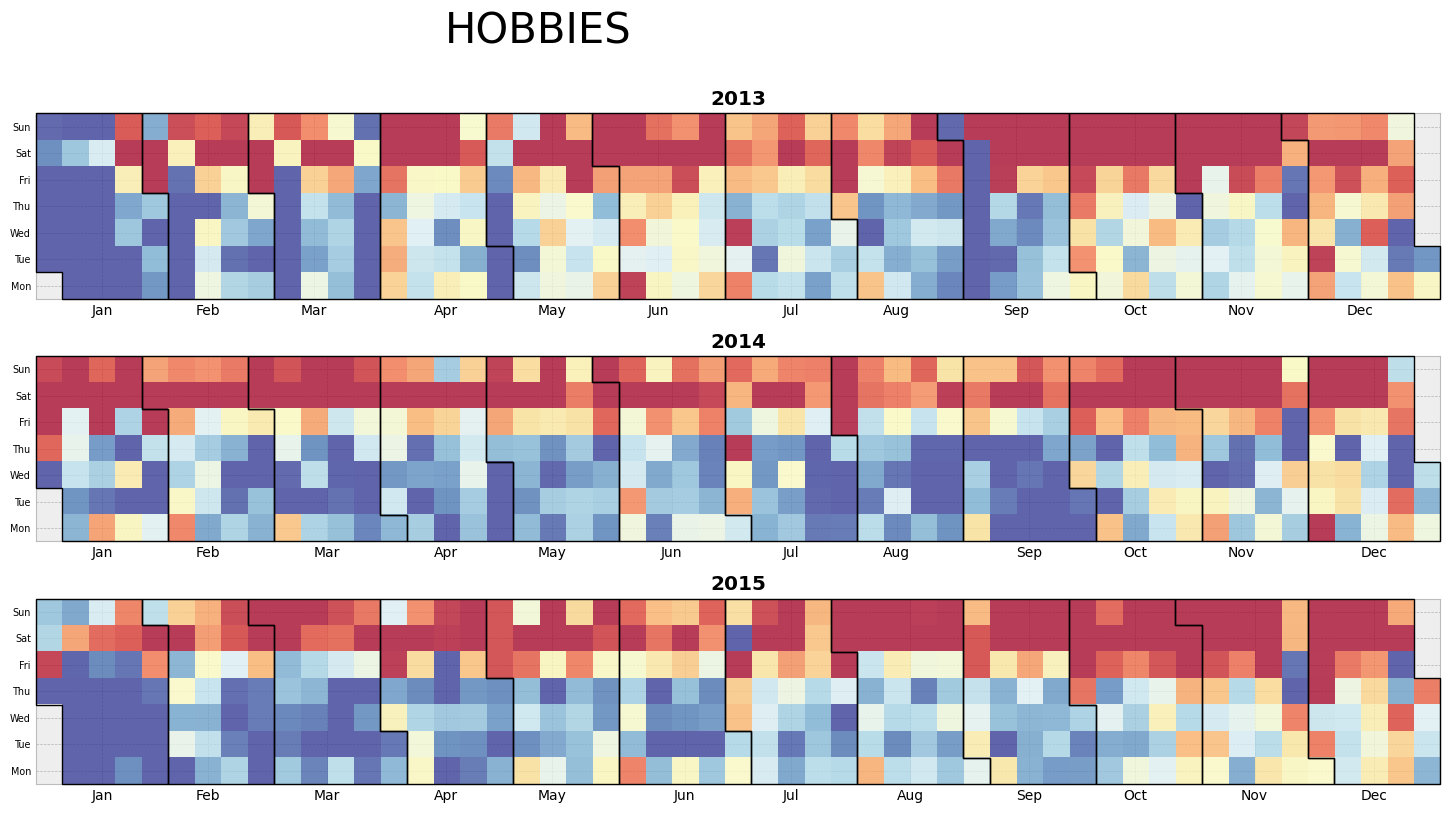

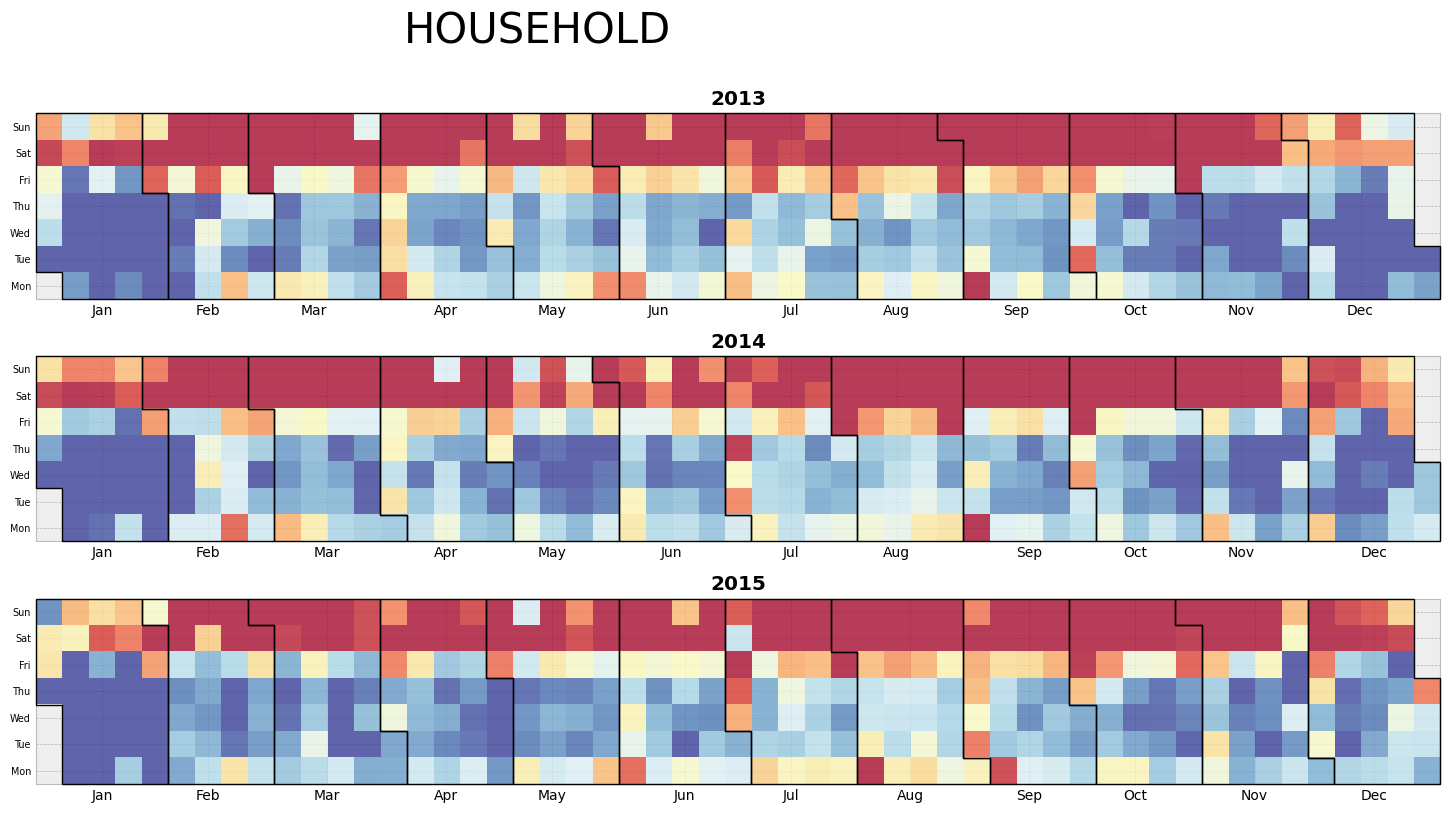

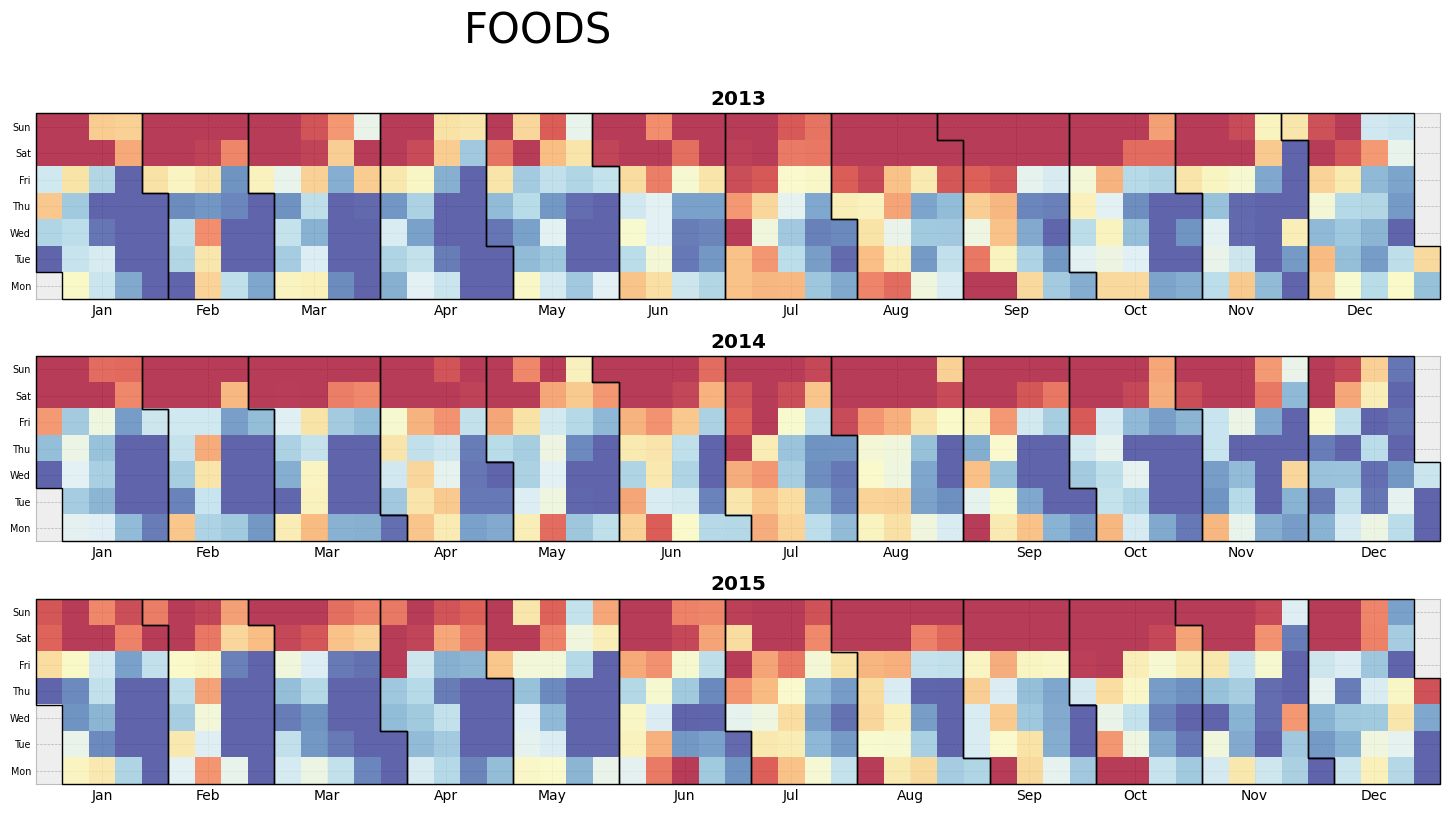

In [27]:
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in stv['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    plt.suptitle(i, fontsize=30, x=0.4, y=1.01)
    plt.tight_layout()
    plt.show()

Some interesting things to note from these heatmaps:

 - Food tends to have lower number of purchases as the month goes on. Could this be because people get their paychecks early in the month?
 - Household and Hobby items sell much less in January - after the Holiday season is over.
 - Cleary weekends are more popular shopping days regardless of the item category.

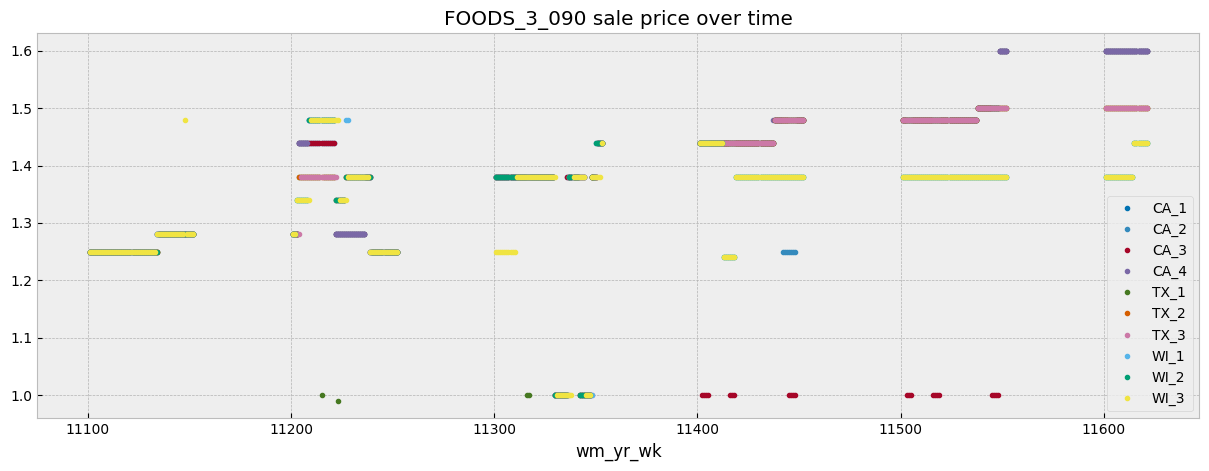

In [23]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Initialize an empty list to store store IDs
stores = []

# Group sell prices by store for the item FOODS_3_090
for store, data in sellp.query('item_id == "FOODS_3_090"').groupby('store_id'):
    # Plot sell prices over time
    data.plot(x='wm_yr_wk',
              y='sell_price',
              style='.',
              color=next(color_cycle),
              figsize=(15, 5),
              title='FOODS_3_090 sale price over time',
              ax=ax,
              legend=store)

    # Add the store ID to the list
    stores.append(store)

# Add legend for each store
plt.legend(stores)

# Show the plot
plt.show()

We are given historical sale prices of each item, with this we can see:

 - It looks like the price of this item is growing.

 - Different stores have different selling prices.

 - Some weeks for some stores the price decreases which can be associated to possible discounts. 